First we upload the data sets locally

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)

Reading the data

In [ ]:
train_path = "/content/train.csv"
train = pd.read_csv(train_path)

test_path = "/content/test.csv"
test = pd.read_csv(test_path)

Taking a look

In [ ]:
train.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


Analyzing the data to begin preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


finding correlation between our features

In [ ]:
train.corr()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.000000,0.009026,0.010947,-0.010074,0.005719,-0.007514,-0.010426,-0.005175,-0.006828,0.004770,-0.008143,-0.002044,-0.004239,0.015961,-0.000916,0.002703
Popularity,0.009026,1.000000,0.172907,0.051820,0.010230,0.124621,0.013747,0.029297,-0.128886,-0.165232,-0.068159,0.054741,-0.002964,-0.027773,0.070232,0.159484
danceability,0.010947,0.172907,1.000000,-0.094806,0.007667,0.056193,-0.069311,0.202985,0.007414,-0.203278,-0.105949,0.444798,-0.180764,-0.127245,0.137127,-0.101152
energy,-0.010074,0.051820,-0.094806,1.000000,0.012834,0.769586,-0.035974,0.120869,-0.746436,-0.187964,0.197802,0.227542,0.205421,0.241190,0.142971,0.215611
key,0.005719,0.010230,0.007667,0.012834,1.000000,0.005738,-0.113318,0.001133,-0.007678,-0.001255,0.014747,0.031505,0.019937,0.014343,0.008123,-0.004175
loudness,-0.007514,0.124621,0.056193,0.769586,0.005738,1.000000,-0.030553,0.090473,-0.614967,-0.350667,0.113663,0.185779,0.161750,0.169003,0.125978,0.174111
mode,-0.010426,0.013747,-0.069311,-0.035974,-0.113318,-0.030553,1.000000,-0.072489,0.020817,-0.019665,-0.002697,-0.007580,0.017616,-0.070849,-0.016817,-0.040092
speechiness,-0.005175,0.029297,0.202985,0.120869,0.001133,0.090473,-0.072489,1.000000,-0.084849,-0.065775,0.072569,0.059227,0.049739,0.006253,0.055992,-0.062784
acousticness,-0.006828,-0.128886,0.007414,-0.746436,-0.007678,-0.614967,0.020817,-0.084849,1.000000,0.182656,-0.109400,-0.127707,-0.162988,-0.321357,-0.139500,-0.240609
instrumentalness,0.004770,-0.165232,-0.203278,-0.187964,-0.001255,-0.350667,-0.019665,-0.065775,0.182656,1.000000,-0.049089,-0.228681,-0.036254,-0.010012,-0.067573,-0.028631


Handling missing values

In [ ]:
print(train.isnull().sum())

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [ ]:
train.interpolate(inplace=True)
print(train.isnull().sum())

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      1
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


In [ ]:
mean_instrumentalness = train['instrumentalness'].mean()
train['instrumentalness'].fillna(mean_instrumentalness, inplace=True)

In [ ]:
print(train.isnull().sum())

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


checking if it's necessary to include the artist names and track names in the classifier


In [ ]:
train['Artist Name'].describe()

count               14396
unique               7913
top       Backstreet Boys
freq                   58
Name: Artist Name, dtype: object

In [ ]:
train['Track Name'].describe()

count     14396
unique    12455
top        Fire
freq          8
Name: Track Name, dtype: object

now we will be feature scaling using min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

numerical_features = ['danceability', 'energy', 'loudness', 'tempo']

train[numerical_features] = scaler.fit_transform(train[numerical_features])


splitting data into features and target

In [ ]:
x = train.drop(['Class', 'Artist Name', 'Track Name'], axis=1)
y = train['Class']


our model is now ready, we will be using xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_metrics = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_metrics)


Accuracy: 0.5052083333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       104
           1       0.06      0.02      0.03       204
           2       0.55      0.34      0.43       235
           3       0.84      0.75      0.79        68
           4       0.63      0.71      0.67        68
           5       0.68      0.67      0.67       236
           6       0.33      0.28      0.30       403
           7       0.90      0.94      0.92        87
           8       0.61      0.52      0.56       292
           9       0.49      0.51      0.50       406
          10       0.45      0.62      0.52       777

    accuracy                           0.51      2880
   macro avg       0.57      0.56      0.56      2880
weighted avg       0.49      0.51      0.49      2880



Using random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_metrics = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_metrics)


Accuracy: 0.49375

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.72       104
           1       0.02      0.01      0.01       204
           2       0.54      0.29      0.38       235
           3       0.89      0.69      0.78        68
           4       0.62      0.66      0.64        68
           5       0.66      0.68      0.67       236
           6       0.28      0.23      0.25       403
           7       0.92      0.95      0.94        87
           8       0.61      0.53      0.57       292
           9       0.50      0.50      0.50       406
          10       0.45      0.62      0.52       777

    accuracy                           0.49      2880
   macro avg       0.56      0.54      0.54      2880
weighted avg       0.48      0.49      0.48      2880



using catboost

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Train the classifier
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_metrics = classification_report(y_test, y_pred)



Learning rate set to 0.089629
0:	learn: 2.2397881	total: 61.7ms	remaining: 1m 1s
1:	learn: 2.1189747	total: 111ms	remaining: 55.5s
2:	learn: 2.0294931	total: 162ms	remaining: 53.9s
3:	learn: 1.9515516	total: 216ms	remaining: 53.7s
4:	learn: 1.8880225	total: 264ms	remaining: 52.5s
5:	learn: 1.8330373	total: 313ms	remaining: 51.9s
6:	learn: 1.7812158	total: 366ms	remaining: 51.9s
7:	learn: 1.7427188	total: 429ms	remaining: 53.2s
8:	learn: 1.7079999	total: 478ms	remaining: 52.6s
9:	learn: 1.6743879	total: 531ms	remaining: 52.5s
10:	learn: 1.6426842	total: 579ms	remaining: 52.1s
11:	learn: 1.6150005	total: 694ms	remaining: 57.1s
12:	learn: 1.5926537	total: 800ms	remaining: 1m
13:	learn: 1.5710662	total: 913ms	remaining: 1m 4s
14:	learn: 1.5477739	total: 1.09s	remaining: 1m 11s
15:	learn: 1.5270139	total: 1.2s	remaining: 1m 14s
16:	learn: 1.5109235	total: 1.3s	remaining: 1m 15s
17:	learn: 1.4940145	total: 1.4s	remaining: 1m 16s
18:	learn: 1.4794752	total: 1.51s	remaining: 1m 18s
19:	learn: 

In [ ]:
# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_metrics)


Accuracy: 0.5236111111111111

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       104
           1       0.02      0.00      0.01       204
           2       0.56      0.40      0.47       235
           3       0.84      0.68      0.75        68
           4       0.60      0.71      0.65        68
           5       0.67      0.69      0.68       236
           6       0.36      0.31      0.33       403
           7       0.92      0.92      0.92        87
           8       0.62      0.52      0.57       292
           9       0.51      0.54      0.52       406
          10       0.47      0.65      0.54       777

    accuracy                           0.52      2880
   macro avg       0.57      0.56      0.56      2880
weighted avg       0.50      0.52      0.51      2880



Since the scores are low so far we will implement some techniques to increase it


Feature selecting

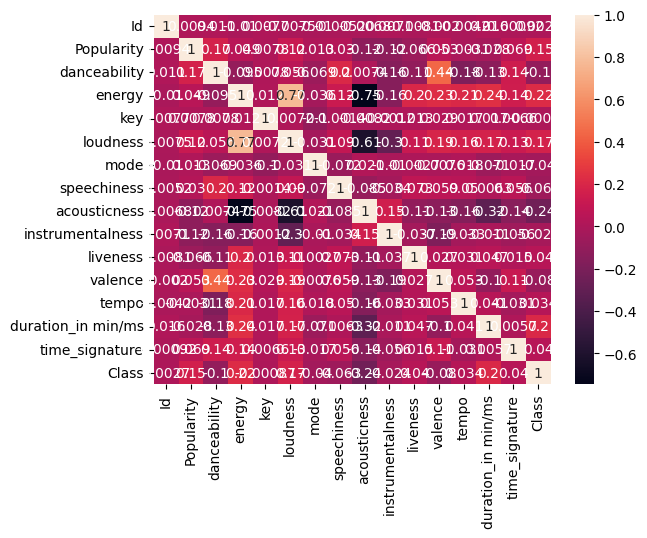

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = train.corr()

# Plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

# Select features with high correlation to the target variable
threshold = 0.5  # Set your desired threshold
selected_features = corr_matrix['Class'].abs().sort_values(ascending=False)[corr_matrix['Class'].abs() > threshold].index


# Subset the dataframe with the selected features
df_selected = train[selected_features]


In [ ]:

# Preprocess the test data (apply the same preprocessing steps as done for the training data)
# ...

# Extract the features from the test data
X_test = test.drop(['Artist Name', 'Track Name'], axis=1)  # Drop non-numerical columns if necessary

# Create a CatBoost Pool for the test data
test_pool = catboost_classifier.Pool(X_test, cat_features=[], feature_names=list(X_test.columns))

# Make predictions on the test data using your trained CatBoost model
y_pred = catboost_classifier.predict(test_pool)  # Replace 'catboost_classifier' with your trained CatBoost classifier

# Save the predictions to a file or use them for further analysis
# ...


Now we apply this work to our test data

In [ ]:
test.info()

In [ ]:
test.describe()

In [ ]:
test.interpolate(inplace=True)
print(test.isnull().sum())

Id                    0
Artist Name           0
Track Name            0
Popularity            1
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64


In [ ]:
mean_Popularity = test['Popularity'].mean()
test['Popularity'].fillna(mean_Popularity, inplace=True)
test.isnull().sum()


Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

we're gonna be using the catboost model

In [ ]:
import catboost

# Load the test data
test_data = pd.read_csv('test.csv')  # Replace 'test.csv' with the path to your test data file

# Preprocess the test data (apply the same preprocessing steps as done for the training data)
# ...

# Extract the features from the test data
X_test = test_data.drop(['Artist Name', 'Track Name'], axis=1)  # Drop non-numerical columns if necessary

# Create a CatBoost Pool for the test data
test_pool = catboost.Pool(data=X_test, cat_features=[], feature_names=list(X_test.columns))


In [ ]:


# Preprocess the test data (apply the same preprocessing steps as done for the training data)
# ...

# Extract the features from the test data
X_test = test.drop(['Artist Name', 'Track Name'], axis=1)  # Drop non-numerical columns if necessary

# Create a CatBoost Pool for the test data
test_pool = catboost_classifier.Pool(X_test, cat_features=[], feature_names=list(X_test.columns))

# Make predictions on the test data using your trained CatBoost model

# Save the predictions to a file or use them for further analysis
# ...


AttributeError: ignored

In [ ]:
y_pred = catboost_classifier.predict(test_pool)  # Replace 'catboost_classifier' with your trained CatBoost classifier


In [ ]:
predictions = catboost_classifier.predict(test_pool)


In [ ]:
output_data = test.copy()
output_data['Predictions'] = predictions
output_data.to_csv('predictions.csv', index=False)


In [ ]:
from sklearn.metrics import accuracy_score

true_labels = output_data['Predictions']
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


saving the data in .csv format

In [ ]:
output_data = output_data.drop(['Artist Name','Track Name','Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature'], axis=1)

In [ ]:
output_data.to_csv("output_data.csv", index = None)